<a href="https://colab.research.google.com/github/MinGyeongdo/NLP_movie_review/blob/main/data_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install pymysql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for environ: filename=environ-1.0-py3-none-any.whl size=3246 sha256=32098bc7fbb854fff5f7436337ed48bf2834c6e9f04e2c26e5a0055ea52b6cad
  Stored in directory: /root/.cache/pip/wheels/93/86/ad/1a3ef74c4a53bc51c69b47610bc0519ee8296b2284cc06b55b
Successfully built environ


In [25]:
import pandas as pd
import pymysql
import json

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
base = '/content/drive/MyDrive/database/'

In [37]:
with open(base+'aws_rds.txt', 'r') as f:
  aws_rds = f.read()
aws_rds = aws_rds.replace('\n', '')
aws_rds = aws_rds.replace('\'','\"')
env = json.loads(aws_rds)

In [47]:
conn = pymysql.connect(host=env['HOST'], user=env['ID'], password=env['PASSWORD'], db=env['DB_NAME'], charset='utf8', autocommit=False, cursorclass=pymysql.cursors.DictCursor)

In [48]:
sql="SELECT * FROM movie_review_20221230"

In [50]:
cursor = conn.cursor()
cursor.execute(sql)
result = cursor.fetchall()
print(result)

[{'titles': '걸프렌즈', 'rates': '1', 'reviews': '해바라기...하 아~~~!!! '}, {'titles': '아바타: 물의 길', 'rates': '10', 'reviews': 'ott 고 나발이고 영화관이 최고야 '}, {'titles': '정승필 실종사건', 'rates': '1', 'reviews': '해바라기 감독. ?맞으세요? '}, {'titles': '젠틀맨', 'rates': '10', 'reviews': '2시간이 너무 빨리 지나간 영화. 연기 조합이 신선하고 좋았다. '}, {'titles': '영웅', 'rates': '10', 'reviews': '별은 왜 5개 뿐..또 보고싶다 '}, {'titles': '젠틀맨', 'rates': '3', 'reviews': '돈 되는 영화를 만들고 싶어서 흔한 한국영화식 장르와 전개를 택하는건 이해가는데 그러려면 재미라도 있어야죠… 영화를 제작하기 위해 노력하신분들에겐 조금 죄송스럽지만 화면 보는 내내 다른 생각했습니다. (잘생긴 배우님들 얼굴 클로즈업 장면 제외) 지루하고 불필요한 장면은 많고 긴장감 없고 살짝 오글거리기까지. 세련되지 않은 영화. 상영기간만 끝나면 바로 잊혀'}, {'titles': '영웅', 'rates': '10', 'reviews': '배우님들의 뮤지컬과 연기가 특출나지 않아서 더 좋았어요. 오히려 각 장면에 몰입할 수 있어서 더욱 좋았던 것 같아요. 정성화 배우님이 독립의 의지로 손가락을 자르실 때, 김고은 배우님이 열차 위에서 뛰어내릴 때, 나문희 배우님이 노래를 부르실 때 정말 마음이 저려왔습니다..ㅠ '}, {'titles': '나이브스 아웃: 글래스 어니언', 'rates': '4', 'reviews': '그냥 보지마세요 간단하게 풀 얘기를 꼬으고꼬으고 또 꼬았는데 뭔말인지도 모르겠고 재미도 없고.. 2시간 날렸네요. 좋아하는 배우들 많이 나와서 기대했는데 폭망 '}, {'titles': '영웅', 'rates': '10', 'revi

In [51]:
conn.close()

In [52]:
df = pd.DataFrame(result)
df.head()

,titles,rates,reviews
0,걸프렌즈,1,해바라기...하 아~~~!!!
1,아바타: 물의 길,10,ott 고 나발이고 영화관이 최고야
2,정승필 실종사건,1,해바라기 감독. ?맞으세요?
3,젠틀맨,10,2시간이 너무 빨리 지나간 영화. 연기 조합이 신선하고 좋았다.
4,영웅,10,별은 왜 5개 뿐..또 보고싶다


In [53]:
df.isnull().sum()

titles     0
rates      0
reviews    0
dtype: int64

In [54]:
df.shape

(9280, 3)

In [55]:
!pip install matplotlib
!pip install seaborn
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


print('파일 크기: ')
for file in os.listdir(base):
  if 'txt' in file:
    print(file.ljust(30)+str(round(os.path.getsize(base + file) / 100000,2))+'MB')

파일 크기: 
ratings.txt                   195.15MB
ratings_train.txt             146.29MB
ratings_test.txt              48.93MB
aws_rds.txt                   0.0MB


In [57]:
#트레인 파일 불러오기
train_data = pd.read_csv(base + 'ratings_train.txt',header = 0, delimiter = '\t', quoting=3)
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [58]:
#리뷰 전체길이 확인
train_length = train_data['document'].astype(str).apply(len)
train_length.head()

0    19
1    33
2    17
3    29
4    61
Name: document, dtype: int64

In [59]:
#리뷰 통계 정보
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length,25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length,75)))

리뷰 길이 최댓값: 158
리뷰 길이 최솟값: 1
리뷰 길이 평균값: 35.24
리뷰 길이 표준편차: 29.58
리뷰 길이 중간값: 27.0
리뷰 길이 제1사분위: 16.0
리뷰 길이 제3사분위: 42.0


In [60]:
# 문자열 아닌 데이터 모두 제거
train_review = [review for review in train_data['document'] if type(review) is str]
train_review

['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.',
 '원작의 긴장감을 제대로 살려내지못했다.',
 '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
 '액션이 없는데도 재미 있는 몇안되는 영화',
 '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?',
 '걍인피니트가짱이다.진짜짱이다♥',
 '볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~',
 '울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해',
 '담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.',
 '취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지',
 'ㄱ냥 매번 긴장되고 재밋음ㅠㅠ',
 '참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다.그냥 까고싶어서 안달난것처럼 보인다',
 '굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록 재미없어지냐',
 '이건 정말 깨알 캐스팅과 질퍽하지않은 산뜻한 내용구성이 잘 버무러진 깨알일드!!♥',
 '약탈자를 위한 변명, 이라. 저놈들은 착한놈들 절대 아닌걸요.',
 '나름 심오한 뜻도 있는 듯. 그냥 학생이 선생과 놀아나는 영화는 절대 아님',
 '보면서 웃지 않는 건 불가능하다',
 '재미없다 지루하고. 같은 음식 영화인데도 바베트의 만찬하고 넘 차이남....바베트의 만찬은 이야기도 있

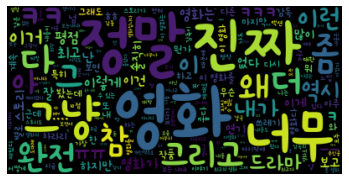

In [61]:
# 트레인데이터 빈도수 확인
wordcloud = WordCloud(base+'godoMaum.ttf').generate(' '.join(train_review))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

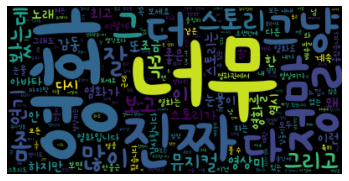

In [62]:
# 크롤링한 리뷰 데이터 단어 빈도 클라우드
movie_review = [review for review in df['reviews'] if type(review) is str]
wordcloud = WordCloud(base+'godoMaum.ttf').generate(' '.join(movie_review))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [63]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 582 kB/s 
     |████████████████████████████████| 465 kB 63.9 MB/s 


In [64]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

train_data = pd.read_csv(base+'ratings_train.txt', header = 0, delimiter='\t', quoting=3)

train_data['document'][:5]

0                                  아 더빙.. 진짜 짜증나네요 목소리
1                    흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                        교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
Name: document, dtype: object

In [65]:
#전처리 함수 만들기
def preprocessing(review, okt, remove_stopwords = False, stop_words =[]):
  #함수인자설명
  # review: 전처리할 텍스트
  # okt: okt객체를 반복적으로 생성하지 않고 미리 생성 후 인자로 받음
  # remove_stopword: 불용어를 제거할지 여부 선택. 기본값 False
  # stop_words: 불용어 사전은 사용자가 직접 입력, 기본값 빈 리스트

  # 1. 한글 및 공백 제외한 문자 모두 제거
  review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)
  
  #2. okt 객체를 활용하여 형태소 단어로 나눔
  word_review = okt.morphs(review_text,stem=True)

  if remove_stopwords:
    #3. 불용어 제거(선택)
    word_review = [token for token in word_review if not token in stop_words]
  return word_review

In [66]:
# 전체 텍스트 전처리
stop_words = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한']
okt = Okt()
clean_train_review = []

for review in train_data['document']:
  # 리뷰가 문자열인 경우만 전처리 진행
  if type(review) == str:
    clean_train_review.append(preprocessing(review,okt,remove_stopwords=True,stop_words= stop_words))
  else:
    clean_train_review.append([]) #str이 아닌 행은 빈칸으로 놔두기

clean_train_review[:4]

[['더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다'],
 ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정']]

In [67]:
#테스트 리뷰도 동일하게 전처리
test_data = pd.read_csv(base + 'ratings_test.txt', header = 0, delimiter='\t', quoting=3)

clean_test_review = []
for review in test_data['document']:
  if type(review) == str:
    clean_test_review.append(preprocessing(review, okt, remove_stopwords=True, stop_words=stop_words))
  else:
    clean_test_review.append([])

In [68]:
# 단어집합 선언, 정수 인코딩 ( 빈도 수 순으로 정수가 배정됨. )
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)


In [69]:
print(tokenizer.word_index)

{'영화': 1, '보다': 2, '하다': 3, '에': 4, '을': 5, '도': 6, '를': 7, '없다': 8, '이다': 9, '있다': 10, '좋다': 11, '너무': 12, '다': 13, '정말': 14, '재밌다': 15, '되다': 16, '적': 17, '만': 18, '같다': 19, '진짜': 20, '으로': 21, '로': 22, '아니다': 23, '않다': 24, '점': 25, '에서': 26, '만들다': 27, '과': 28, '나오다': 29, '연기': 30, '평점': 31, '최고': 32, '내': 33, '그': 34, '나': 35, '안': 36, '인': 37, '스토리': 38, '생각': 39, '못': 40, '왜': 41, '드라마': 42, '게': 43, '감동': 44, '사람': 45, '보고': 46, '이렇다': 47, '말': 48, '아깝다': 49, '고': 50, '더': 51, 'ㅋㅋ': 52, '배우': 53, '때': 54, '와': 55, '재미있다': 56, '감독': 57, '거': 58, '그냥': 59, '요': 60, '재미': 61, '시간': 62, '내용': 63, '뭐': 64, '까지': 65, '중': 66, '주다': 67, '재미없다': 68, '자다': 69, '좀': 70, '쓰레기': 71, '하고': 72, '지루하다': 73, '네': 74, '모르다': 75, '가다': 76, '들다': 77, '그렇다': 78, '싶다': 79, '지': 80, '작품': 81, '사랑': 82, '알다': 83, '하나': 84, '다시': 85, '볼': 86, '마지막': 87, '잘': 88, '이건': 89, '정도': 90, '저': 91, '완전': 92, 'ㅋ': 93, '오다': 94, 'ㅠㅠ': 95, '많다': 96, 'ㅋㅋㅋ': 97, '처음': 98, '장면': 99, '액션': 100, '주인공': 101, '이렇게': 102

In [70]:
threshold = 3
total_cnt= len(tokenizer.word_index)
rare_cnt = 0
total_freq = 0 
rare_freq = 0 

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
      rare_cnt = rare_cnt + 1
      rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)


단어 집합(vocabulary)의 크기 : 43756
등장 빈도가 2번 이하인 희귀 단어의 수: 24328
단어 집합에서 희귀 단어의 비율: 55.599232105311266
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.739957034509022


In [71]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 19429


In [72]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(clean_train_review)
clean_train_review = tokenizer.texts_to_sequences(clean_train_review)


In [73]:
clean_test_review = tokenizer.texts_to_sequences(clean_test_review)

In [74]:
clean_train_review[:3]

[[463, 20, 265, 664],
 [923, 465, 46, 604, 1, 219, 1459, 30, 969, 680, 24],
 [393, 2456, 2323, 5680, 2, 226, 13]]

In [75]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [76]:
# 위에서 빈도수 2 이하의 단어들을 제거하였으므로 해당 컬럼의 리뷰는 빈 샘플이 되기 때문에 제거해줌.

drop_train = [ index for index, sentence in enumerate(clean_train_review) if len(sentence) < 1]

In [77]:
# 빈 샘플들을 제거
X_train = np.delete(clean_train_review, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

148491
148491


/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


리뷰의 최대 길이 : 69
리뷰의 평균 길이 : 11.381551743876733


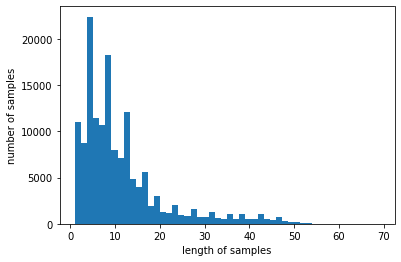

In [78]:
# 패딩, 샘플들의 길이를 동일하게 맞춰준다.

print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [79]:
# 최대 길이의 변수이름을 max_len으로 정하고, 해당길이가 총 리뷰들의 길이의 몇퍼센트를 커버하는지 계산하는 함수

def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [80]:
max_len = 35
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 35 이하인 샘플의 비율: 95.34517243469301


In [81]:
# 모든 리뷰의 길이를 35로 맞춰준다.

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(clean_test_review, maxlen=max_len)

In [82]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)
model.summary()

Epoch 1/15
1854/1857 [============================>.] - ETA: 0s - loss: 0.3858 - acc: 0.8268
Epoch 1: val_acc improved from -inf to 0.84575, saving model to best_model.h5
1857/1857 [==============================] - 23s 8ms/step - loss: 0.3857 - acc: 0.8268 - val_loss: 0.3485 - val_acc: 0.8458
Epoch 2/15
1852/1857 [============================>.] - ETA: 0s - loss: 0.3242 - acc: 0.8595
Epoch 2: val_acc improved from 0.84575 to 0.85814, saving model to best_model.h5
1857/1857 [==============================] - 14s 7ms/step - loss: 0.3243 - acc: 0.8594 - val_loss: 0.3267 - val_acc: 0.8581
Epoch 3/15
1854/1857 [============================>.] - ETA: 0s - loss: 0.2982 - acc: 0.8736
Epoch 3: val_acc improved from 0.85814 to 0.86151, saving model to best_model.h5
1857/1857 [==============================] - 15s 8ms/step - loss: 0.2984 - acc: 0.8735 - val_loss: 0.3216 - val_acc: 0.8615
Epoch 4/15
1854/1857 [============================>.] - ETA: 0s - loss: 0.2791 - acc: 0.8843
Epoch 4: val_acc

In [88]:
history.history

{'loss': [0.385743647813797,
  0.32427123188972473,
  0.29837480187416077,
  0.2792225182056427,
  0.26309216022491455,
  0.24802425503730774,
  0.23258523643016815,
  0.2168491780757904,
  0.2012290358543396],
 'acc': [0.8268149495124817,
  0.8594181537628174,
  0.8735100030899048,
  0.884209394454956,
  0.8919960856437683,
  0.8995471000671387,
  0.906828761100769,
  0.9141693115234375,
  0.9218887090682983],
 'val_loss': [0.3484625518321991,
  0.32665809988975525,
  0.3215771019458771,
  0.3240743577480316,
  0.32043352723121643,
  0.3343818783760071,
  0.3427249491214752,
  0.34511598944664,
  0.35580170154571533],
 'val_acc': [0.8457523584365845,
  0.8581433892250061,
  0.8615105152130127,
  0.8600625991821289,
  0.8616788387298584,
  0.8539681434631348,
  0.8571332097053528,
  0.8603320121765137,
  0.8537998199462891]}

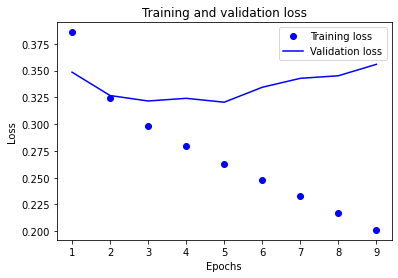

In [89]:
history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

- validation loss 가 더 이상 증가하지 않는 epochs 5 의 모델을 best 모델로 저장했음을 알 수 있다.

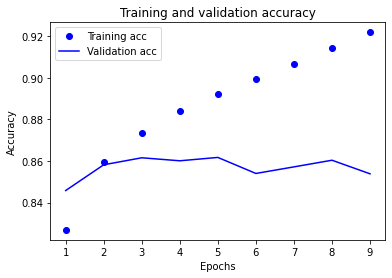

In [90]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [91]:
# 최종 평가
model = load_model('best_model.h5')
model.evaluate(X_test, y_test, verbose=2)


1563/1563 - 5s - loss: 0.3354 - acc: 0.8529 - 5s/epoch - 3ms/step


[0.3353942632675171, 0.8528800010681152]

In [83]:
df.head()

,titles,rates,reviews
0,걸프렌즈,1,해바라기...하 아~~~!!!
1,아바타: 물의 길,10,ott 고 나발이고 영화관이 최고야
2,정승필 실종사건,1,해바라기 감독. ?맞으세요?
3,젠틀맨,10,2시간이 너무 빨리 지나간 영화. 연기 조합이 신선하고 좋았다.
4,영웅,10,별은 왜 5개 뿐..또 보고싶다


In [92]:
# 예측할 데이터에도 동일한 전처리 진행

def  predict(df):
  # 전체 텍스트 전처리
  stop_words = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한']
  okt = Okt()
  reviews = []

  for review in df['reviews']:
    # 리뷰가 문자열인 경우만 전처리 진행
    if type(review) == str:
      reviews.append(preprocessing(review,okt,remove_stopwords=True,stop_words= stop_words))
    else:
      reviews.append([]) #str이 아닌 행은 빈칸으로 놔두기

  reviews= tokenizer.texts_to_sequences(reviews)
  reviews = pad_sequences(reviews, maxlen=max_len)
  model = load_model('best_model.h5')
  result = model.predict(reviews) # 예측

  return result


In [93]:
score = predict(df)
len(score)

290/290 [==============================] - 1s 3ms/step


9280

In [94]:
new_df = df.copy()

In [95]:
new_df['IsGood'] = score

In [100]:
# 감정 분류 결과
new_df.sample(10)

,titles,rates,reviews,IsGood
943,젠틀맨,10,흥미로운 설정 흥미로운 스토리ㅋㅋㅋㅋ 마무리까지 깔끔,0.327747
1280,집으로...,10,"너무나애뜻,따듯하고슬픈이야기",0.989630
7469,극한직업,10,몇번 봐도 웃기다 ㅎㅎㅎㅎ,0.980452
310,아바타: 물의 길,10,최고 꼭 보세요 후회안하실겁니다,0.986107
5886,아바타: 물의 길,10,정말 감동적인 무비였다,0.978628
1648,아바타: 물의 길,5,전개가 너무 억지스럽고 너무나 지루하다. 영상미는 훌륭하다.,0.073821
2384,아바타: 물의 길,9,13년 기다림 보람있고 친구나 지인들에게 무조건 추천합니다 그리고 cg처리 미쳤다 ...,0.985668
8307,나이브스 아웃: 글래스 어니언,6,"진짜 기대했는데, 이런 밍밍한 전개는 당황스럽네.서로 속고 속이는 뜨악한 반전도 없...",0.007460
5498,아바타: 물의 길,9,"나름 좀더 내면의 모습 , 가족이야기지만 감독의 평소 세계관을 볼 수있었다. 다음편...",0.984572
8999,영웅,10,웃기고 울리고 너무 재밌고 감동입니다 최고,0.996982


- 참고
  - [네이버 영화리뷰 감정 분류 데이터](https://github.com/e9t/nsmc/)
  - [네이버 영화 리뷰 감성 분류 하기](https://wikidocs.net/44249)